In [88]:
import yfinance as yf


In [89]:
btc = yf.Ticker('BTC-USD')

In [90]:
btc.info

{'name': 'Bitcoin',
 'startDate': 1278979200,
 'description': 'Bitcoin (BTC) is a cryptocurrency launched in 2010. Users are able to generate BTC through the process of mining. Bitcoin has a current supply of 19,768,834. The last known price of Bitcoin is 67,244.32506374 USD and is down -0.20 over the last 24 hours. It is currently trading on 11778 active market(s) with $36,535,899,182.93 traded over the last 24 hours. More information can be found at https://bitcoin.org/.',
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 67607.54,
 'open': 67607.54,
 'dayLow': 66805.35,
 'dayHigh': 67893.0,
 'regularMarketPreviousClose': 67607.54,
 'regularMarketOpen': 67607.54,
 'regularMarketDayLow': 66805.35,
 'regularMarketDayHigh': 67893.0,
 'volume': 31546955776,
 'regularMarketVolume': 31546955776,
 'averageVolume': 31474190353,
 'averageVolume10days': 31652663433,
 'averageDailyVolume10Day': 31652663433,
 'marketCap': 1329701322752,
 'fiftyTwoWeekLow': 28177.988,
 'fiftyTwoWeekHigh': 7375

In [91]:
data = yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [92]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [93]:
data.reset_index
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [94]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [95]:
data.drop(columns = ['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1, inplace = True)
data.head()

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


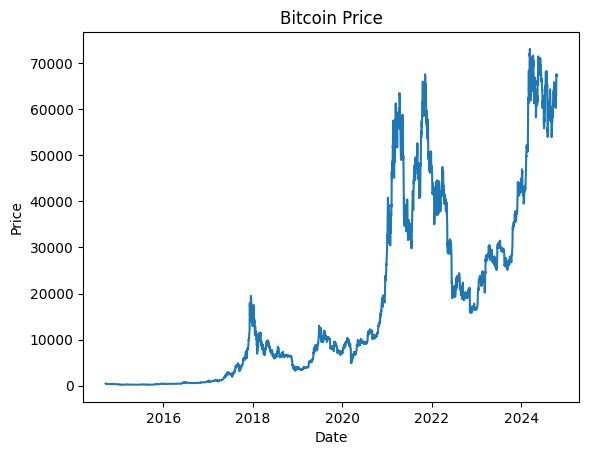

In [96]:
import matplotlib.pyplot as plt
plt.plot(data)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price')
plt.show()

In [97]:
data.reset_index(inplace = True)
data.drop(['Date'], inplace = True, axis = 1)
data.head()

,Close
0,457.334015
1,424.440002
2,394.795990
3,408.903992
4,398.821014


In [98]:
train = data.iloc[0:-150, :]
test = data.iloc[-150 : , :]

In [99]:
train.shape, test.shape

((3534, 1), (150, 1))

In [100]:
type(train)

pandas.core.frame.DataFrame

In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [102]:
train

array([[0.00383005],
       [0.00337886],
       [0.00297225],
       ...,
       [0.9157443 ],
       [0.90665804],
       [0.9775695 ]])

In [103]:
test.shape

(150, 1)

In [104]:
lookup = 150 # number of days to look at in order to predict the output of current day

In [105]:
x = []
y = []
for i in range(lookup, train.shape[0]):
    x.append(train[i-lookup : i, :])
    y.append(train[i, 0])

In [106]:
import numpy as np
x = np.array(x)
y = np.array(y)

In [107]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Input

In [108]:
x.shape

(3384, 150, 1)

In [109]:
model = Sequential()
model.add(Input(shape = (x.shape[1], 1)))
model.add(LSTM(256,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(256, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(256, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(256, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(1))

In [110]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

In [111]:
es = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights=True, min_delta = 0.01)

In [112]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 150, 256)            │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 150, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 150, 256)            │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 150, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_12 (LSTM)                       │ (None, 150, 256)            │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 150, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 150, 256)            │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 150, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 256)                 │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,365,697 (9.02 MB)

 Trainable params: 2,365,697 (9.02 MB)

 Non-trainable params: 0 (0.00 B)

In [113]:
model.compile(optimizer = 'adam', loss = 'mae', metrics = [RootMeanSquaredError()])
model.fit(x, y, epochs = 50, verbose = 1, batch_size = 32 ,validation_split = 0.2, callbacks = [es])

Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 311s 4s/step - loss: 0.1040 - root_mean_squared_error: 0.2331 - val_loss: 0.0340 - val_root_mean_squared_error: 0.0538
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 317s 3s/step - loss: 0.0269 - root_mean_squared_error: 0.0498 - val_loss: 0.0303 - val_root_mean_squared_error: 0.0453
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 293s 3s/step - loss: 0.0222 - root_mean_squared_error: 0.0406 - val_loss: 0.0238 - val_root_mean_squared_error: 0.0316
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 320s 3s/step - loss: 0.0225 - root_mean_squared_error: 0.0414 - val_loss: 0.0420 - val_root_mean_squared_error: 0.0476
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 323s 3s/step - loss: 0.0238 - root_mean_squared_error: 0.0438 - val_loss: 0.0361 - val_root_mean_squared_error: 0.0413
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 320s 3s/step - loss: 0.0241 - root_mean_squared_error: 0.0424 - val_loss: 0.0468 - val_root_mean_squared_error: 0.0619
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 323s 3s/step - loss:

In [114]:
from sklearn.metrics import mean_absolute_percentage_error
y_pred = model.predict(x)
y_true = y
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f'MAPE: {mape * 100:.2f}%')

106/106 ━━━━━━━━━━━━━━━━━━━━ 90s 844ms/step
MAPE: 12.86%


In [115]:
import pandas as pd

In [116]:
type(test)

numpy.ndarray

In [117]:
train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [118]:
test = pd.concat((train.tail(lookup), test), ignore_index = True)

In [119]:
test.shape[0]

300

In [120]:
x_test = []
y_test = []
for i in range(lookup, test.shape[0]):
    x_test.append(test.iloc[i-lookup : i, :])

    y_test.append(test.iloc[i, 0])

In [121]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [122]:
y_test.shape, y_pred.shape

((150,), (3384, 1))

In [123]:
x_test.shape, y_test.shape

((150, 150, 1), (150,))

In [124]:
mape_test = mean_absolute_percentage_error(y_test, model.predict(x_test))
print(f'MAPE: {mape_test * 100:.2f}%')

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 700ms/step
MAPE: 4.53%


In [125]:
y_test = y_test.reshape(-1, 1)

In [126]:
y.shape, y_test.shape

((3384,), (150, 1))

In [127]:
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 712ms/step


In [128]:
y_pred.shape

(150, 1)

In [129]:
y_pred_df = pd.DataFrame(y_pred)
y_test_df = pd.DataFrame(y_test)
table = pd.concat([y_pred_df, y_test_df], axis = 1)
table.columns = ['Predicted', 'Actual']
table

,Predicted,Actual
0,63931.992188,70136.531250
1,64577.417969,69122.335938
2,65299.285156,67929.562500
3,66036.859375,68526.101562
4,66730.125000,69265.945312
...,...,...
145,62176.375000,62851.375000
146,62094.414062,66046.125000
147,62111.851562,67041.109375
148,62263.046875,67612.718750


In [132]:
table.tail()

,Predicted,Actual
145,62176.375000,62851.375000
146,62094.414062,66046.125000
147,62111.851562,67041.109375
148,62263.046875,67612.718750
149,62569.128906,67262.039062


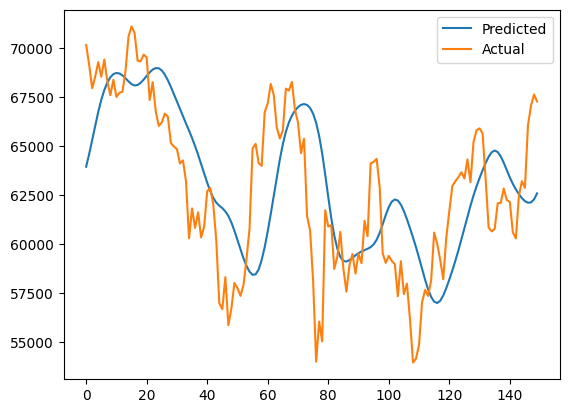

In [131]:
plt.plot(table['Predicted'], label = 'Predicted')
plt.plot(table['Actual'], label = 'Actual')
plt.legend()
plt.show()

In [134]:
model.save('model.keras')

In [138]:
from google.colab import files
files.download('model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [180]:
priceAndDate = yf.download('BTC-USD')
priceAndDate.reset_index(inplace = True)
last_date = priceAndDate.iloc[-1, 0]

[*********************100%***********************]  1 of 1 completed


In [181]:
last_date = str(last_price).split()[0]

In [182]:
last_date

'2024-10-17'

In [183]:
from datetime import datetime, timedelta
current_date = datetime.strptime(last_date, '%Y-%m-%d')
next_date = current_date + timedelta(days=1)
next_date_str = next_date.strftime('%Y-%m-%d')
next_date_str

'2024-10-18'

In [190]:
def get_next_date(last_date):
    current_date = datetime.strptime(last_date, '%Y-%m-%d')
    next_date = current_date + timedelta(days=1)
    next_date_str = next_date.strftime('%Y-%m-%d')
    next_date_str
    return next_date_str

In [191]:
type(get_next_date('2023-01-01'))

str

In [208]:
prices = test.iloc[-lookup :, :]
prices = np.array(prices)
prices = prices[:, 0]
dates = []
new_prices = []
future_days = 10
for i in range(future_days):
    input_to_model = prices[-lookup:]
    input_to_model = np.reshape(input_to_model, (1, lookup, 1))
    y_pred = model.predict(input_to_model)
    new_prices.append(scaler.inverse_transform(y_pred))
    prices = np.append(prices, y_pred)
    dates.append(get_next_date(last_date))
    last_date = get_next_date(last_date)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


In [200]:
dates = [datetime.strptime(date, '%Y-%m-%d') for date in dates]

In [209]:
new_prices = np.reshape(new_prices, (-1, ))

In [210]:
new_prices

array([63022.79 , 63555.434, 64080.707, 64529.46 , 64865.008, 65082.207,
       65198.18 , 65240.81 , 65239.26 , 65217.863], dtype=float32)

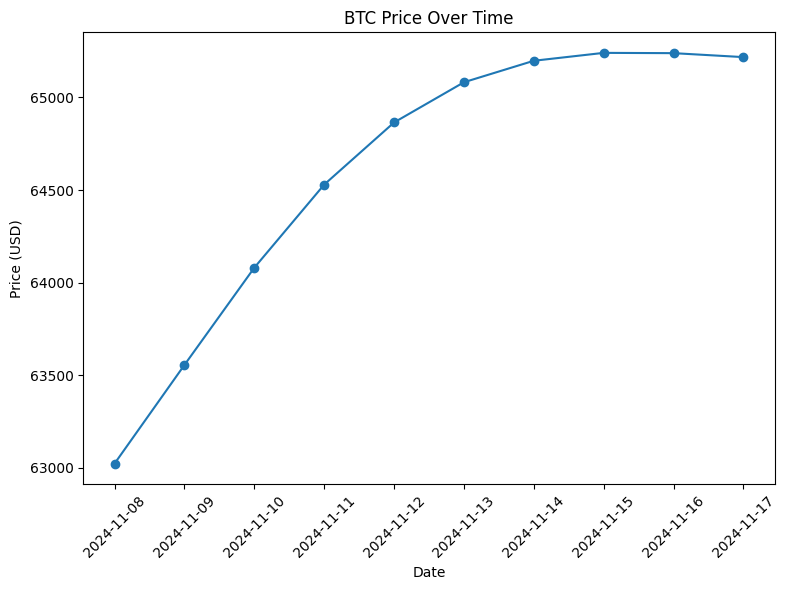

In [212]:
plt.figure(figsize=(8, 6))
plt.plot(dates, new_prices, marker='o')

# Labeling the graph
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('BTC Price Over Time')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()